| Probability | 30s     | 30-60s  | 60-180s | 180-300s |
|-------------|---------|---------|---------|----------|
| 0.3-0.5%    | 0,875   | 1       | 0,1875  | 0,025    |
| 0.5-0.7%    | 0,05    | 0,01875 | 0       | 0        |
| 0.7-0.9%    | 0,01    | 0,003   | 0       | 0,00025  |
| 0.9-1.1%    | 0,004   | 0,00075 | 0       | 0        |
| 1.1-1.3%    | 0,00375 | 0       | 0       | 0        |
| 1.3-1.5%    | 0,0025  | 0       | 0       | 0        |
| >1.5%       | 0,00525 | 0       | 0       | 0        |

In [5]:
import numpy as np
from scipy.optimize import curve_fit

# Time intervals (midpoints)
time_intervals = np.array([15, 45, 120, 240])

# Profit intervals (midpoints)
profit_intervals = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])

# Observed probabilities
observed_probabilities = np.array([
    [0.875, 1.0, 0.1875, 0.025],
    [0.05, 0.01875, 0, 0],
    [0.01, 0.003, 0, 0.00025],
    [0.004, 0.00075, 0, 0],
    [0.00375, 0, 0, 0],
    [0.0025, 0, 0, 0],
    [0.00525, 0, 0, 0]
])

# Create a grid of all possible combinations of time and profit intervals
time_mesh, profit_mesh = np.meshgrid(time_intervals, profit_intervals)

# Flatten the arrays
time_mesh_flat = time_mesh.ravel()
profit_mesh_flat = profit_mesh.ravel()

observed_probabilities_flat = observed_probabilities.flatten()

Now, let's define a mathematical model to fit the data. We will use a Polynomial function as our model.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the 2D polynomial model
def polynomial_2d_model(degree=2):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression(fit_intercept=False))
    ])

# Fit the data using the 2D polynomial model
model = polynomial_2d_model(degree=3)
model.fit(np.vstack((time_mesh_flat, profit_mesh_flat)).T, observed_probabilities_flat)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))])

Now that we have the fitted parameters, we can create a function to calculate the probability of making a profit given the transaction time and profit percentage.

In [7]:
# Create a function to calculate the probability of making a profit given the transaction time and profit percentage
def probability_of_profit(time, profit, model):
    predict = model.predict(np.array([[time, profit]]))[0]
    return max(0, min(predict, 1))

# Example usage
time = 100
profit = 0.63
prob = probability_of_profit(time, profit, model)
print(f"Probability of making a profit with a transaction time of {time} seconds and a profit of {profit}%: {prob:.4f}")

Probability of making a profit with a transaction time of 100 seconds and a profit of 0.63%: 0.0370


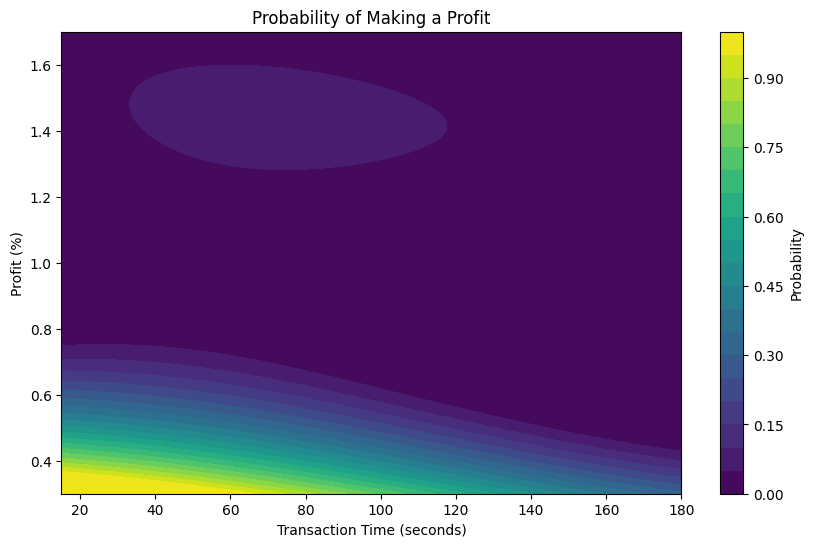

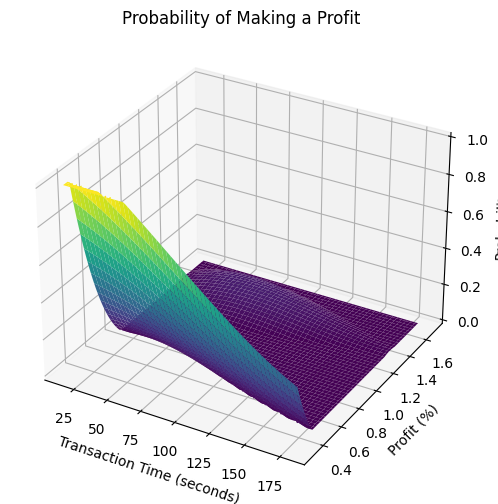

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the time and profit values
time_values = np.linspace(15, 180, 100)
profit_values = np.linspace(0.3, 1.7, 100)

# Create a meshgrid of the time and profit values
time_mesh, profit_mesh = np.meshgrid(time_values, profit_values)

probabilities = np.array([
    probability_of_profit(time, profit, model)
    for time, profit in zip(np.ravel(time_mesh), np.ravel(profit_mesh))
]).reshape(time_mesh.shape)

# Create the 2D contour plot of the probabilities
fig1, ax1 = plt.subplots(figsize=(10, 6))
contour = ax1.contourf(time_mesh, profit_mesh, probabilities, cmap='viridis', levels=20)
fig1.colorbar(contour, ax=ax1, label='Probability')
ax1.set_xlabel('Transaction Time (seconds)')
ax1.set_ylabel('Profit (%)')
ax1.set_title('Probability of Making a Profit')

# Create the 3D surface plot of the probabilities
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(time_mesh, profit_mesh, probabilities, cmap='viridis')
ax2.set_xlabel('Transaction Time (seconds)')
ax2.set_ylabel('Profit (%)')
ax2.set_zlabel('Probability')
ax2.set_title('Probability of Making a Profit')

# Show both plots side by side
plt.subplots_adjust(wspace=0.4)
plt.show()


In [9]:
# Get the coefficients and intercept
coefficients = model.named_steps['linear'].coef_

# Create a JSON object
model_json = {
    'coefficients': coefficients.tolist(),
}
print(model_json)

{'coefficients': [3.2249590845866583, -0.008487893619997352, -8.289355052151508, -2.7553679060180372e-05, 0.018381381764979644, 6.682066508973032, 1.136819970260633e-07, -1.132177881582365e-05, -0.006509158078653439, -1.741753472222248]}
